DEEP REINFORCEMENT LEARNING EXPLAINED - 04
# **Deep Learning with PyTorch**
## First contact with PyTorch for beginners


1. Import required libraries

In [1]:
# https://github.com/pytorch/vision/issues/1938#issuecomment-789986996
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [2]:
import torch 
import torchvision

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
EPOCHS = 10 
BATCH_SIZE= 64

2. Load and Preprocessing Data

In [4]:
xy_trainPT = torchvision.datasets.MNIST(root='./data', train=True, download=True,transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()])) 
xy_trainPT_loader = torch.utils.data.DataLoader(xy_trainPT, batch_size=BATCH_SIZE)

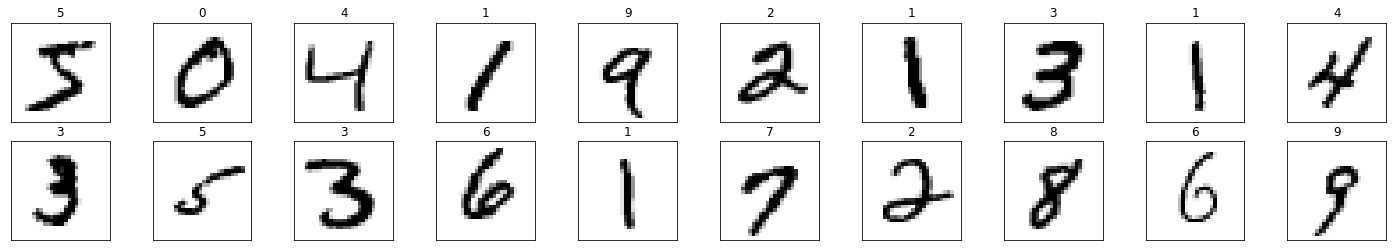

In [5]:
fig = plt.figure(figsize=(25, 4)) 
for idx in np.arange(20):
   image, label = xy_trainPT [idx]
   ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
   ax.imshow(torch.squeeze(image, dim = 0).numpy(), cmap=plt.cm.binary)
   ax.set_title(str(label))

In [6]:
image, _ = xy_trainPT [0] 
print(image.size())
image_flatten = image.view(image.shape[0], -1)
print (image_flatten.size())

torch.Size([1, 28, 28])
torch.Size([1, 784])


Tensors

In [7]:
a = torch.randn(2, 3)
print(a)

tensor([[-0.3776, -1.1870,  0.1614],
        [-1.4291,  0.0740, -1.5337]])


In [8]:
print(a.size())
print(a.dim())

torch.Size([2, 3])
2


In [9]:
matrix=torch.zeros([2, 4], dtype=torch.int32)
print(matrix)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)


In [10]:
print(matrix.dtype)

torch.int32


In [11]:
b = torch.zeros(2, 3)
print(b)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [12]:
c = torch.ones(2, 3)
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [13]:
c[0,0]=222 
print(c)

tensor([[222.,   1.,   1.],
        [  1.,   1.,   1.]])


In [14]:
x = torch.Tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) 
print (x)
print ("x column 1: ", x[:, 1])
print ("x row 0: ", x[0, :])
print ("x rows 0,1 & cols 1,2: \n", x[0:2, 1:3])

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
x column 1:  tensor([ 2.,  6., 10.])
x row 0:  tensor([1., 2., 3., 4.])
x rows 0,1 & cols 1,2: 
 tensor([[2., 3.],
        [6., 7.]])


In [15]:
x = np.array([[1,2], [3,4], [5,6]])
print (x)

[[1 2]
 [3 4]
 [5 6]]


In [16]:
y=torch.from_numpy(x)
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


In [17]:
z = y.numpy()
print (z)

[[1 2]
 [3 4]
 [5 6]]


In [18]:
one_d = torch.arange(0,16)
print (one_d)
two_d= one_d.reshape(4,4)
print (two_d)
print(two_d.size())

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])
torch.Size([4, 4])


3. Define Model

In [19]:
modelPT= torch.nn.Sequential(            
         torch.nn.Linear(784,10),
         torch.nn.Sigmoid(), 
         torch.nn.Linear(10,10), 
         torch.nn.LogSoftmax(dim=1) 
         )

4. Define the Optimizer and the Loss function

In [20]:
criterion = torch.nn.NLLLoss()

In [21]:
 optimizer = torch.optim.SGD(modelPT.parameters(), lr=0.01)

5. Train the model

In [22]:
for e in range(EPOCHS):
    running_loss = 0
    for images, labels in xy_trainPT_loader:
        images = images.view(images.shape[0], -1)
        output = modelPT(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(xy_trainPT_loader)))

Epoch 0 - Training loss: 2.2140613255470294
Epoch 1 - Training loss: 1.9499023151296033
Epoch 2 - Training loss: 1.651940277136211
Epoch 3 - Training loss: 1.4045752183969087
Epoch 4 - Training loss: 1.2070220914730894
Epoch 5 - Training loss: 1.0513942113309018
Epoch 6 - Training loss: 0.9299559522666403
Epoch 7 - Training loss: 0.8349341942684483
Epoch 8 - Training loss: 0.7600495802250498
Epoch 9 - Training loss: 0.7004144790012445


6. Evaluate and use the Model

In [23]:
xy_testPT = torchvision.datasets.MNIST(root='./data', train=False, download=True, 
            transform=torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
xy_test_loaderPT = torch.utils.data.DataLoader(xy_testPT)
correct_count, all_count = 0, 0
for images,labels in xy_test_loaderPT:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    logps = modelPT(img)
    ps = torch.exp(logps)
    probab = list(ps.detach().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
print("\nAccuracy of the model =",(correct_count/all_count))         


Accuracy of the model = 0.8594
